## Importation de data

In [56]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [57]:

# Chargement du dataset Titanic
titanic = sns.load_dataset('titanic')

# Aperçu des données
print(titanic.head())


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [58]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## Nettoyer les données

In [59]:
from sklearn.preprocessing import LabelEncoder
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'alone']
# copier du dataset pour le prétraitement
df = titanic.copy()
df = df[features + ['survived']]
df.dropna(inplace=True)  # supprimer les valeurs manquantes
df

,pclass,sex,age,sibsp,parch,fare,embarked,alone,survived
0,3,male,22.0,1,0,7.2500,S,False,0
1,1,female,38.0,1,0,71.2833,C,False,1
2,3,female,26.0,0,0,7.9250,S,True,1
3,1,female,35.0,1,0,53.1000,S,False,1
4,3,male,35.0,0,0,8.0500,S,True,0
...,...,...,...,...,...,...,...,...,...
885,3,female,39.0,0,5,29.1250,Q,False,0
886,2,male,27.0,0,0,13.0000,S,True,0
887,1,female,19.0,0,0,30.0000,S,True,1
889,1,male,26.0,0,0,30.0000,C,True,1


In [60]:
# Assurer le bon type des colonnes avant encodage
for col in ['sex', 'embarked', 'alone']:
    df[col] = df[col].astype(str)

# Créer les encodeurs et les entraîner AVANT le dropna
encoders = {}
for col in ['sex', 'embarked', 'alone']:
    le = LabelEncoder()
    le.fit(df[col])
    encoders[col] = le

# Encodage
for col in ['sex', 'embarked', 'alone']:
    df[col] = encoders[col].transform(df[col])


In [61]:
X = df.drop('survived', axis=1)
y = df['survived']


In [62]:
# Séparer données d'entraînement/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [63]:
# Entraîner le modèle
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [64]:
#  Évaluer les performances
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[67 13]
 [17 46]]
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        80
           1       0.78      0.73      0.75        63

    accuracy                           0.79       143
   macro avg       0.79      0.78      0.79       143
weighted avg       0.79      0.79      0.79       143



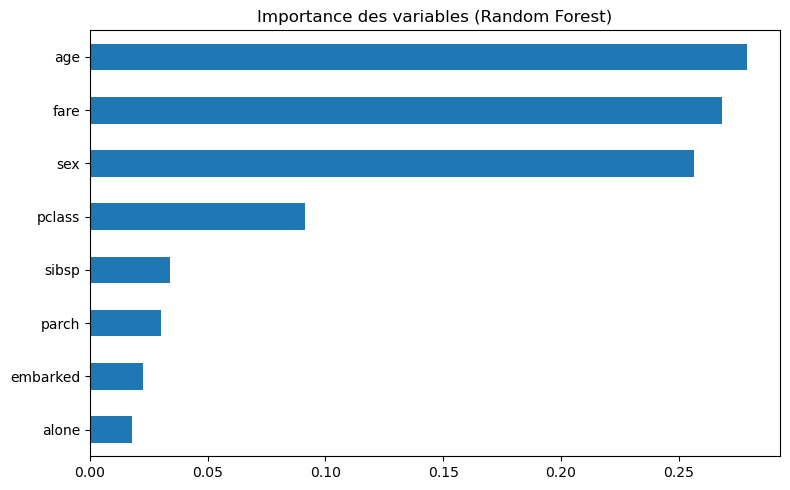

In [65]:
#  Visualiser l’importance des variables
importances = model.feature_importances_
pd.Series(importances, index=X.columns).sort_values().plot(kind='barh', figsize=(8,5))
plt.title("Importance des variables (Random Forest)")
plt.tight_layout()
plt.show()

In [66]:
# Exemple de passager brut
new_passenger = {
    'pclass': 2,
    'sex': 'male',
    'age': 34,
    'sibsp': 1,
    'parch': 5,
    'fare': 12000,
    'embarked': 'S',
    'alone': True
}

# Encodage des colonnes catégorielles
for col in ['sex', 'embarked', 'alone']:
    val = str(new_passenger[col])
    encoder = encoders[col]

    if val in encoder.classes_:
        new_passenger[col] = encoder.transform([val])[0]
    else:
        raise ValueError(f"Valeur inconnue pour '{col}': {val}")


In [67]:
import pandas as pd

# Convertir le dictionnaire en DataFrame
X_new = pd.DataFrame([new_passenger])

# Faire la prédiction
prediction = model.predict(X_new)[0]

# Afficher le résultat
if prediction == 1:
    print(" Ce passager aurait survécu.")
    proba = model.predict_proba(X_new)[0][1]  # probabilité de survie
    print(f"Probabilité de survie : {proba:.2%}")

else:
    print(" Ce passager n'aurait pas survécu.")


 Ce passager n'aurait pas survécu.


In [72]:
# autre test :
# Exemple de passager brut
new_passenger2 = {
    'pclass': 1,
    'sex': 'male',
    'age': 38,
    'sibsp': 1,
    'parch': 0,
    'fare': 71.2833,
    'embarked': 'C',
    'alone': False
}

# Encodage des colonnes catégorielles
for col in ['sex', 'embarked', 'alone']:
    val = str(new_passenger2[col])
    encoder = encoders[col]

    if val in encoder.classes_:
        new_passenger2[col] = encoder.transform([val])[0]
    else:
        raise ValueError(f"Valeur inconnue pour '{col}': {val}")


In [73]:

# Convertir le dictionnaire en DataFrame
X_new2 = pd.DataFrame([new_passenger2])

# Faire la prédiction
prediction = model.predict(X_new2)[0]

# Afficher le résultat
if prediction == 1:
    print(" Ce passager aurait survécu.")
    proba = model.predict_proba(X_new2)[0][1]  # probabilité de survie
    print(f"Probabilité de survie : {proba:.2%}")

else:
    print(" Ce passager n'aurait pas survécu.")


 Ce passager aurait survécu.
Probabilité de survie : 62.00%
